                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   

   na_sales  jp_sales  pal

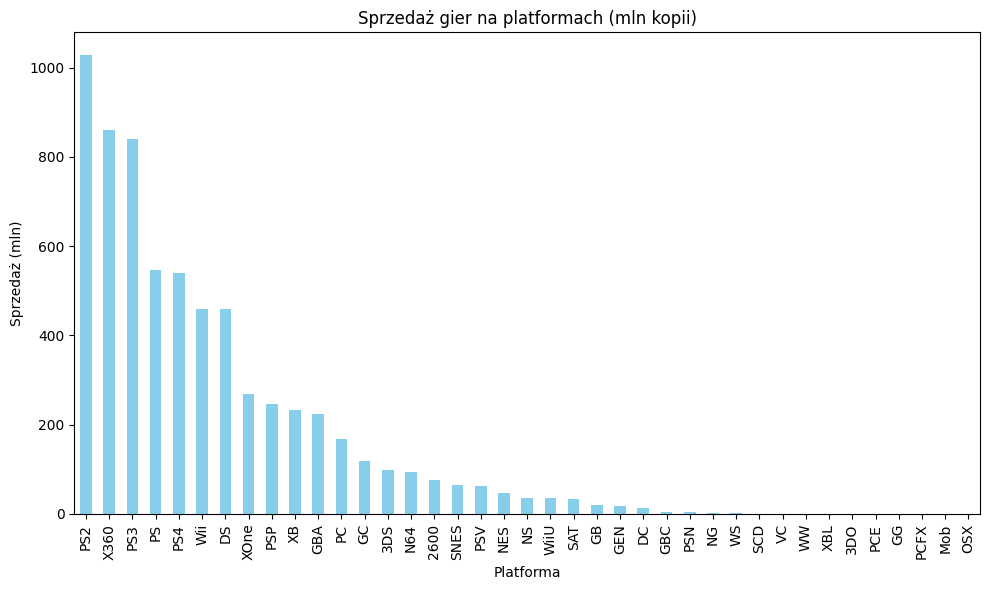

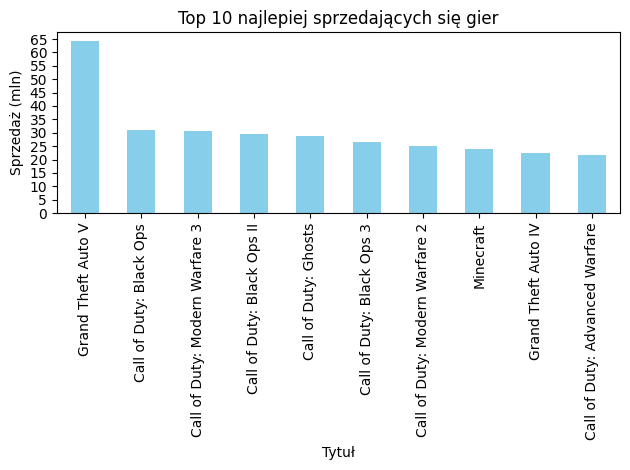

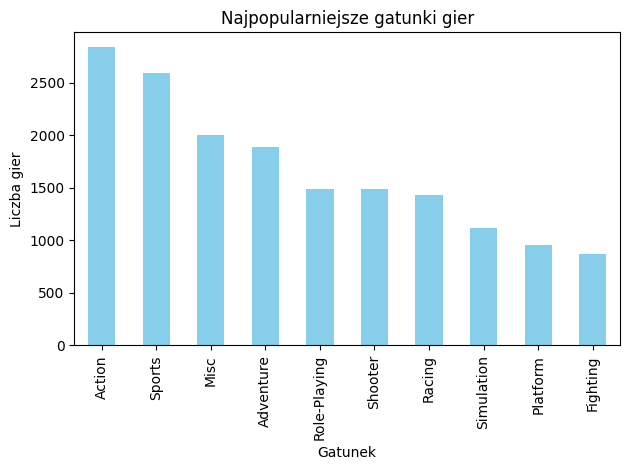

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

data = pd.read_csv('vgchartz-2024.csv')

print(data.head())
print(data.info())
print(data.describe())

print("----------------------------")

critical_cols = ['title', 'console', 'total_sales']
data_clean = data.dropna(subset=critical_cols).copy()

data_clean['release_date'] = pd.to_datetime(data_clean['release_date'], errors='coerce')
data_clean['last_update'] = pd.to_datetime(data_clean['last_update'], errors='coerce')

print(data_clean.info())
print(data_clean.isnull().sum())

print("----------------------------")

# Sumuje sprzedaż gry na wszystkich platformach
filtered_data = data_clean[
    ~data_clean['title'].str.lower().str.contains('bundle|double pack|collection', na=False)
]

gta = filtered_data[filtered_data['title'].str.contains('Grand Theft Auto V', na=False)]
print(gta[['title', 'console', 'total_sales']])

game_sales = filtered_data.groupby('title')['total_sales'].sum()
top_title = game_sales.idxmax()
top_value = game_sales.max()
print("Najlepiej sprzedająca się gra (wszystkie platformy):", top_title, "| Sprzedaż:", top_value)

# Liczba wystąpień każdego gatunku
genre_counts = data_clean['genre'].value_counts()

# Najpopularniejszy gatunek i jego liczba wystąpień
top_genre = genre_counts.idxmax()
top_genre_count = genre_counts.max()

print(f"Najpopularniejszy gatunek gier: {top_genre} | Liczba gier: {top_genre_count}")

# Liczba gier wydanych przez każdego wydawcę
publisher_counts = data_clean['publisher'].value_counts()

# Wydawca z największą liczbą gier
top_publisher = publisher_counts.idxmax()
top_publisher_count = publisher_counts.max()

print(f"Najwięcej gier wydał: {top_publisher} | Liczba gier: {top_publisher_count}")

print("-------------------------------")
print("Wykresy:")

# Sprzedaż gier na poszczególnych konsolach
platform_sales = data_clean.groupby('console')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
platform_sales.plot(kind='bar', color='skyblue')
plt.title('Sprzedaż gier na platformach (mln kopii)')
plt.xlabel('Platforma')
plt.ylabel('Sprzedaż (mln)')
plt.tight_layout()
plt.show()

# Top 10 najlepiej sprzedających się gier
top_games = data_clean.groupby('title')['total_sales'].sum().sort_values(ascending=False).head(10)
ax = top_games.plot(kind='bar', color='skyblue')
plt.title('Top 10 najlepiej sprzedających się gier')
plt.xlabel('Tytuł')
plt.ylabel('Sprzedaż (mln)')
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.tight_layout()
plt.show()

genre_counts = data_clean['genre'].value_counts().head(10)
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Najpopularniejsze gatunki gier')
plt.xlabel('Gatunek')
plt.ylabel('Liczba gier')
plt.tight_layout()
plt.show()
